<a href="https://colab.research.google.com/github/oliverfoster27/Practical-Machine-Learning/blob/master/Week%206/C6_Autoencoder_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Autoencoder
### Directives
* Create the autoencoders described below, you can play with the topology, those are just starting points
* Use GPU runtime
* Print 10 inputs and their associated outputs
* Don't forget to normalize your data
* Use the Functional API for Keras
* Plot the model loss over time

### Autoencoders to build
1. Stacked
2. Convolutional Encoder

#### Don't worry if the data you generate looks bad. This is just an exercise, we can't really measure performance on an unsupervised task

In [31]:
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = fashion_mnist.load_data()
all_data = np.concatenate((X_train, X_test))
all_data.shape

(70000, 28, 28)

In [0]:
def print_first_9(data):
  fig = plt.figure()
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i], interpolation='none')
    plt.title("Digit: {}".format(i))
    plt.xticks([])
    plt.yticks([])

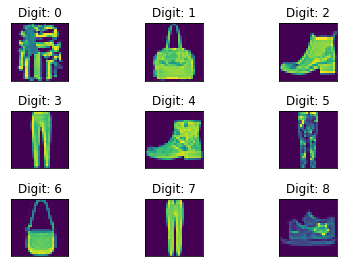

In [33]:
print_first_9(all_data[-9:])

In [0]:
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization, UpSampling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers
import math
import keras.backend as K

# Stacked Autoencoder

In [35]:
SA_X_train = X_train.reshape(-1, 784)
SA_X_test = X_test.reshape(-1, 784)
SA_X_train = SA_X_train / 255
SA_X_test = SA_X_test / 255
print(SA_X_train.shape, SA_X_test.shape)

K.clear_session()

model1 = Sequential()

'''
Encoder:
'''
model1.add(Dense(200, activation='relu', input_shape=(784, )))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='relu'))

'''
Decoder:
'''
model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(200, activation='relu'))

'''
Output:
'''
model1.add(Dense(784, activation='relu'))

optimizer = Adam(lr=10e-6)
model1.compile(optimizer=optimizer,
              loss='mean_squared_error')

model1.summary()

h1 = model1.fit(SA_X_train, SA_X_train, batch_size=128, epochs=80, 
              verbose=1, validation_split=0.3)

(60000, 784) (10000, 784)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               2200      
_________________________________________________________________
dense_5 (Dense)              (None, 784)          

### View Training Loss

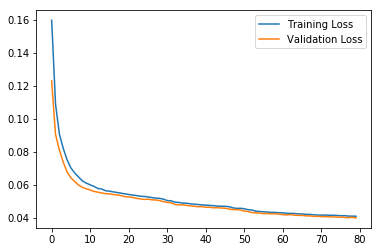

In [36]:
plt.plot(h1.history['loss'], label='Training Loss')
plt.plot(h1.history['val_loss'], label='Validation Loss')
plt.legend()

### Print Auto-Encoded Data and Real Input Data

In [0]:
SA_test_encoded = model1.predict(SA_X_test).reshape(-1, 28, 28)

Auto-encoded data:


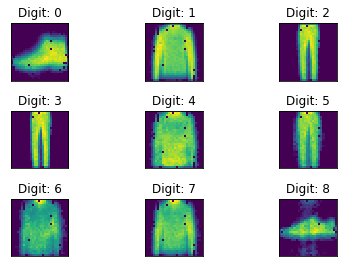

In [38]:
print("Auto-encoded data:")
print_first_9(SA_test_encoded)

Original data:


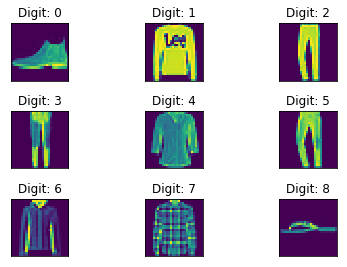

In [39]:
print("Original data:")
print_first_9(SA_X_test.reshape(-1, 28, 28))

# **Convolutional Autoencoder**

In [46]:
CA_X_train = X_train.reshape(-1, 28, 28, 1)
CA_X_test = X_test.reshape(-1, 28, 28, 1)
CA_X_train = CA_X_train / 255
CA_X_test = CA_X_test / 255
print(CA_X_train.shape, CA_X_test.shape)

K.clear_session()

model2 = Sequential()

'''
Encoder:
'''
model2.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))

'''
Decoder:
'''
model2.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
model2.add(UpSampling2D(size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(16, (3, 3),  padding='same', activation='relu'))
model2.add(UpSampling2D(size=(2, 2)))
model2.add(Dropout(0.3))

'''
Output:
'''
model2.add(Conv2D(1, (3, 3),  padding='same',activation='relu'))

optimizer = Adam(lr=10e-6)
model2.compile(optimizer=optimizer,
              loss='mean_squared_error')

model2.summary()

h2 = model2.fit(CA_X_train, CA_X_train, batch_size=128, epochs=80, 
               verbose=1, validation_split=0.3)

(60000, 28, 28, 1) (10000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14

### View Training Loss

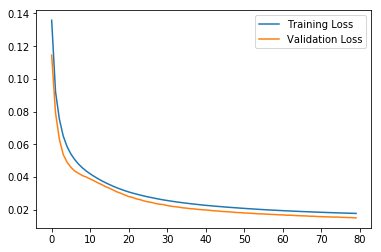

In [47]:
plt.plot(h2.history['loss'], label='Training Loss')
plt.plot(h2.history['val_loss'], label='Validation Loss')
plt.legend()

### Print Auto-Encoded Data and Real Input Data

In [0]:
CA_test_encoded = model2.predict(CA_X_test)[:, :, :, 0]

Auto-encoded data:


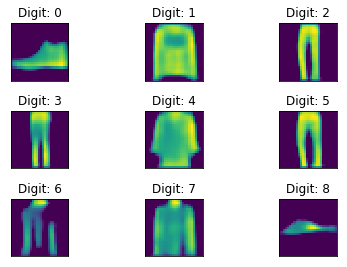

In [49]:
print("Auto-encoded data:")
print_first_9(CA_test_encoded)

Original data:


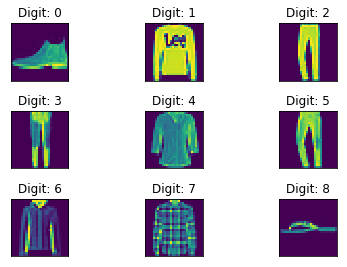

In [50]:
print("Original data:")
print_first_9(CA_X_test[:, :, :, 0])